In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind


metadata = pd.read_csv('~/Documents/bioc3301_project/ngs_data/emp_data/emp_qiime_mapping_qc_filtered.tsv', sep='\t')

# select only soil data 
mask1 = metadata['Description'].str.contains('soil', na=False) 
soil_data = metadata[mask1]
soil_data.head()

# soil_data.to_csv('~/Documents/soil_data.csv', sep='\t')

,#SampleID,BarcodeSequence,LinkerPrimerSequence,Description,host_subject_id,study_id,title,principal_investigator,doi,ebi_accession,...,adiv_shannon,adiv_faith_pd,temperature_deg_c,ph,salinity_psu,oxygen_mg_per_l,phosphate_umol_per_l,ammonium_umol_per_l,nitrate_umol_per_l,sulfate_umol_per_l
1537,632.Agricultural.soil.soy,GCGTTCTAGCTG,GTGCCAGCMGCCGCGGTAA,"Agricultural soil - soy, Ontario",10AS,632,Canadian MetaMicroBiome Initiative samples,Josh Neufeld,10.4056/sigs.1974654,ERP020023,...,8.249587,84.786655,NaN,7.60,NaN,NaN,NaN,NaN,NaN,NaN
1538,632.Agricultural.soil.wheat,GATGTTCGCTAG,GTGCCAGCMGCCGCGGTAA,"Agricultural soil - wheat, Ontario",11AW,632,Canadian MetaMicroBiome Initiative samples,Josh Neufeld,10.4056/sigs.1974654,ERP020023,...,8.688437,89.158835,NaN,7.40,NaN,NaN,NaN,NaN,NaN,NaN
1547,632.Wetland.soil,ATGGGTTCCGTC,GTGCCAGCMGCCGCGGTAA,"Wetland soil, Mt. St. Hilaire",9WLM,632,Canadian MetaMicroBiome Initiative samples,Josh Neufeld,10.4056/sigs.1974654,ERP020023,...,9.038355,92.810241,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN
1637,659.NZFACE.R1.Browntop,CCACCCAGTAAC,GTGCCAGCMGCCGCGGTAA,soil sample from Ring 1 of NZ FACE expt . In r...,R1-Browntop,659,New Zealand Free Air CO2 Enrichment (FACE) soi...,Saman Bowatte,10.1016/j.soilbio.2013.03.014*,ERP017166,...,4.924068,37.599963,NaN,5.05,NaN,NaN,NaN,NaN,NaN,NaN
1638,659.NZFACE.R1.control.19.4,AGCGACGAAGAC,GTGCCAGCMGCCGCGGTAA,soil sample from Ring 1 of NZ FACE expt . In r...,R1-control,659,New Zealand Free Air CO2 Enrichment (FACE) soi...,Saman Bowatte,10.1016/j.soilbio.2013.03.014*,ERP017166,...,6.220316,55.842196,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN


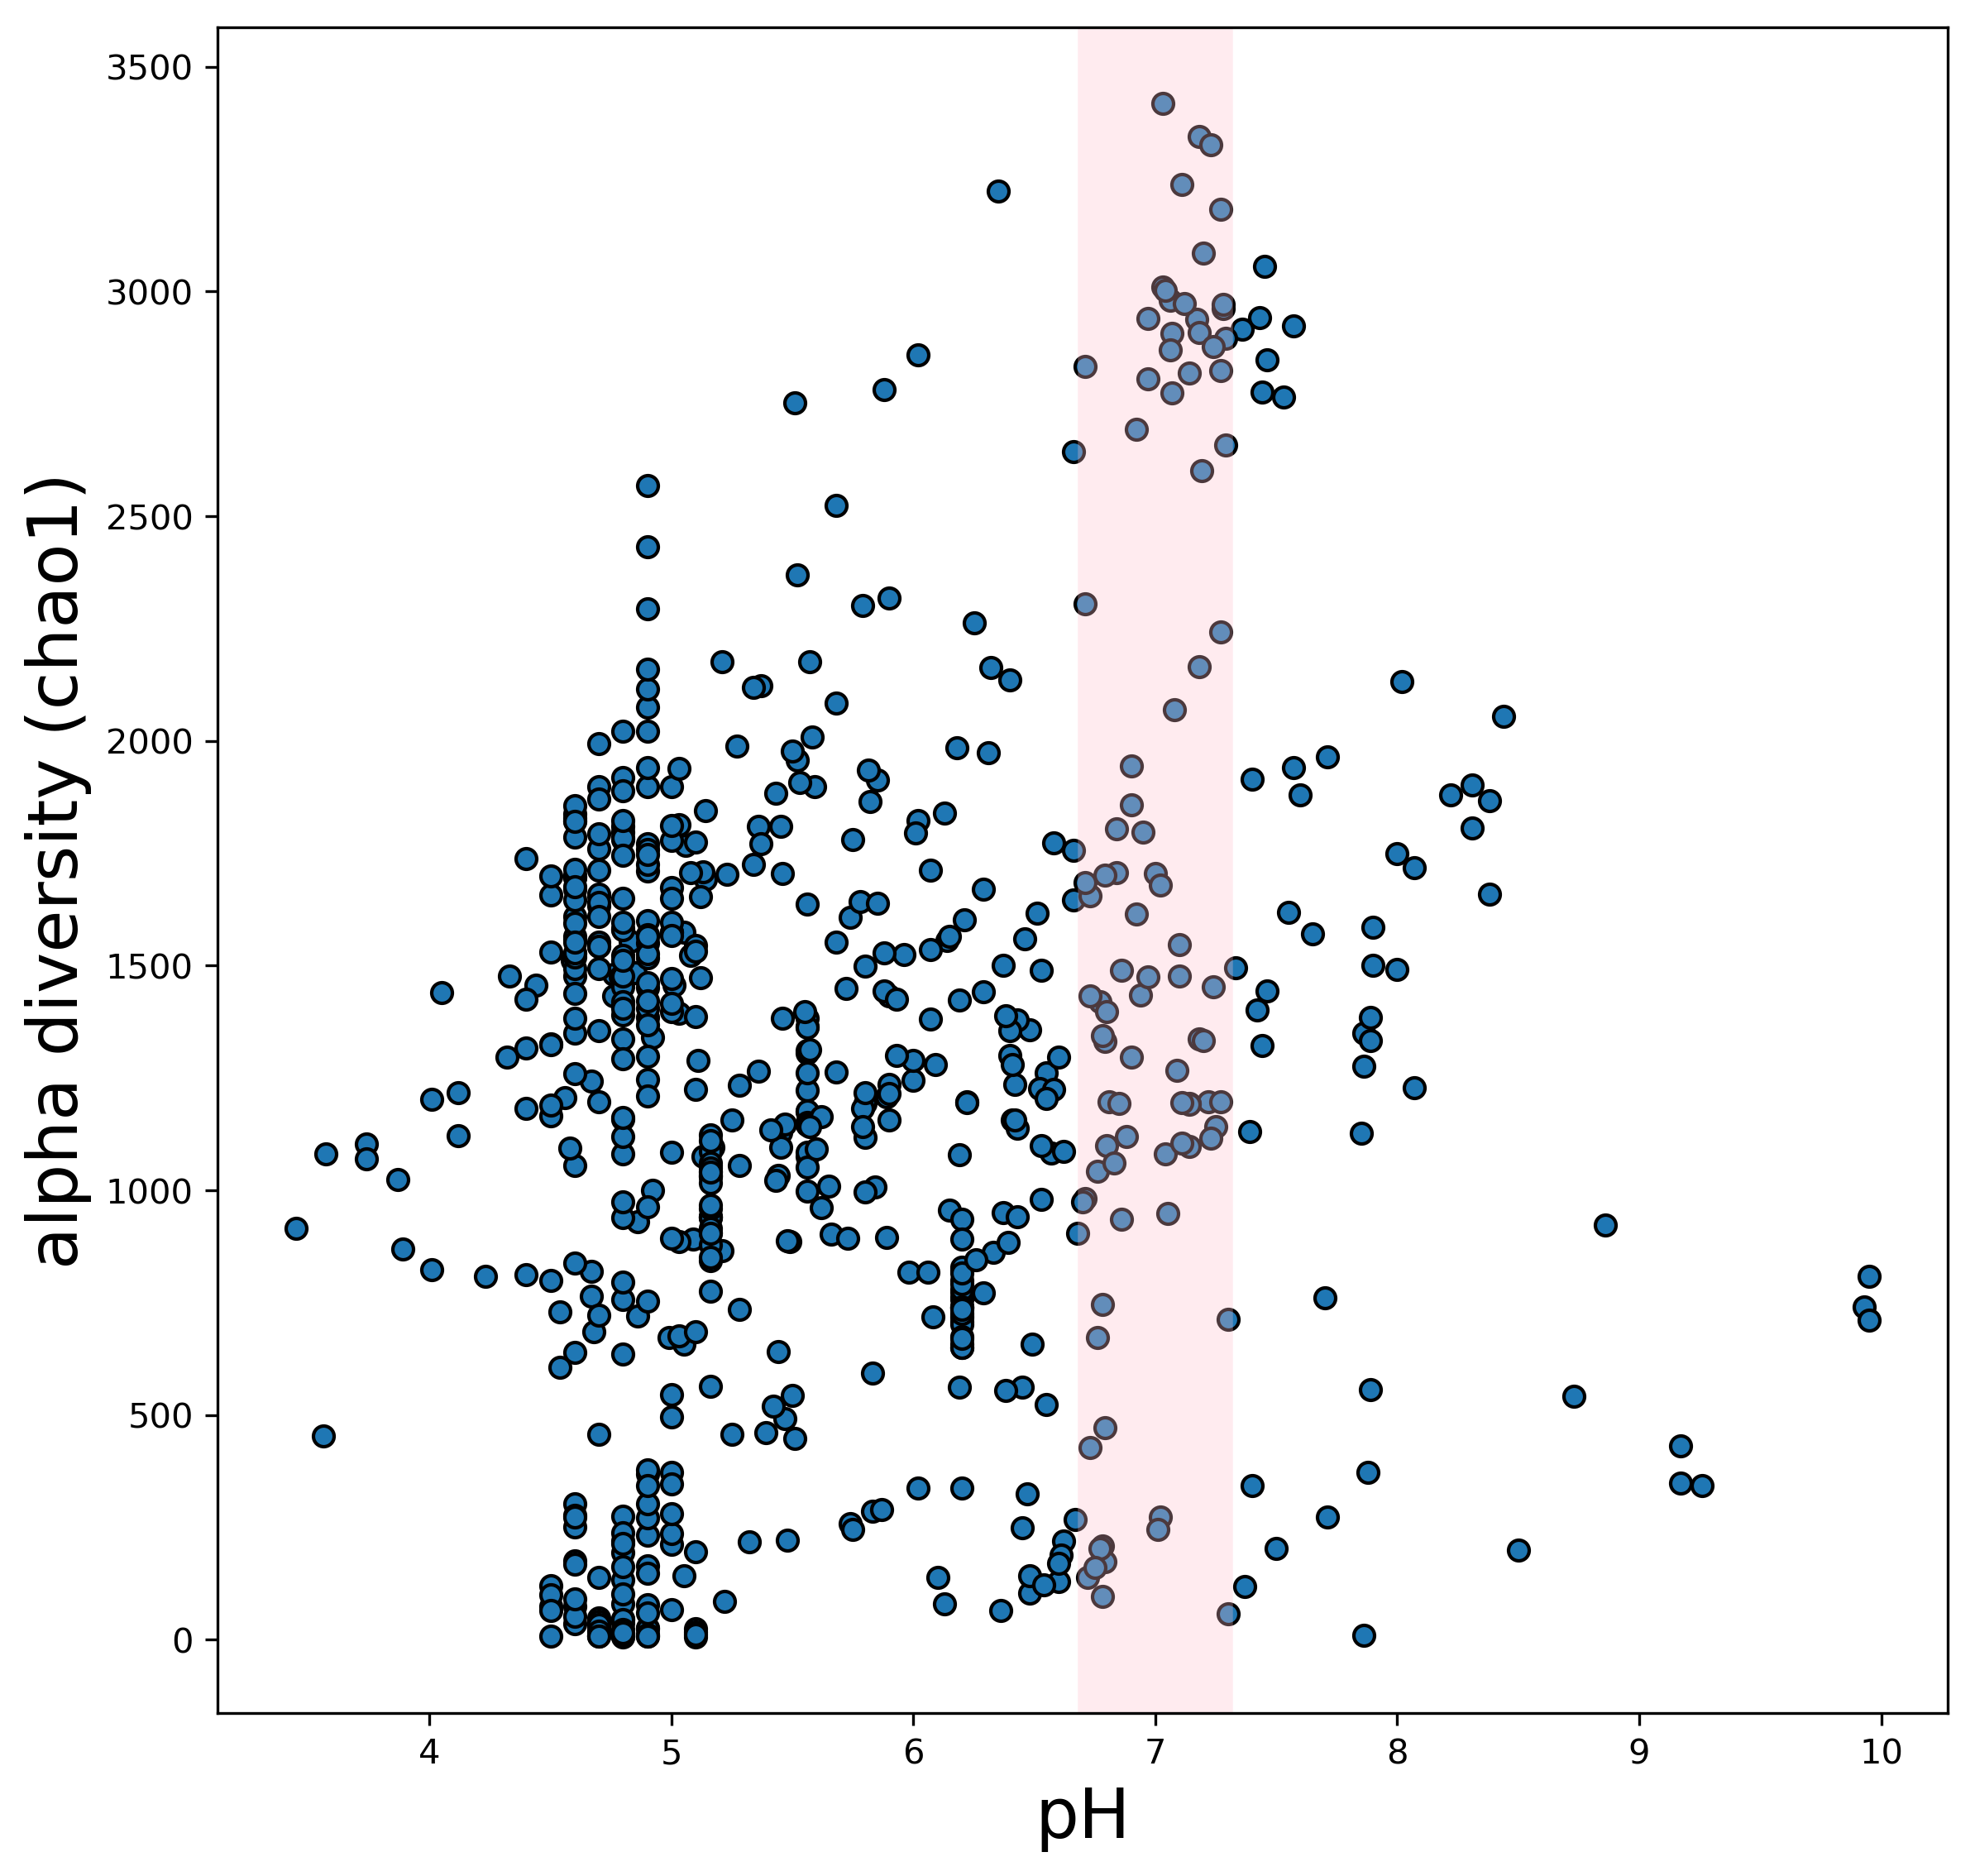

In [100]:
#sort by pH  
soil_data_ph = soil_data.dropna(axis=0, subset=['ph'])
soil_data_ph.shape

#plot a-diversity against pH 
fig, axis = plt.subplots(figsize=(9,9), dpi=300)

# fig = plt.figure(figsize=(10, 10))
# ax = plt.subplot(1, 1, 1)

X = soil_data_ph['ph']
Y = soil_data_ph['adiv_chao1']

# axis.set_title('a-diversity as a function of soil pH',fontsize=12)
axis.set_xlabel('pH',fontsize=20)
axis.set_ylabel('alpha diversity (chao1)',fontsize=20)
axis.scatter(X, Y, edgecolors='black')
plt.axvline(7.0, linewidth=45, color = 'pink', alpha = 0.3)
plt.show()





# plt.plot(soil_data_ph['ph'].values, soil_data_ph['adiv_chao1'].values)
# plt.xlabel('pH')
# plt.ylabel('a-div metric (chao1)')

# plt.show()

In [74]:
from scipy.stats.stats import spearmanr
print spearmanr(soil_data_ph['ph'], soil_data_ph['adiv_chao1'])

SpearmanrResult(correlation=0.18623725023825344, pvalue=1.1030277980792335e-06)


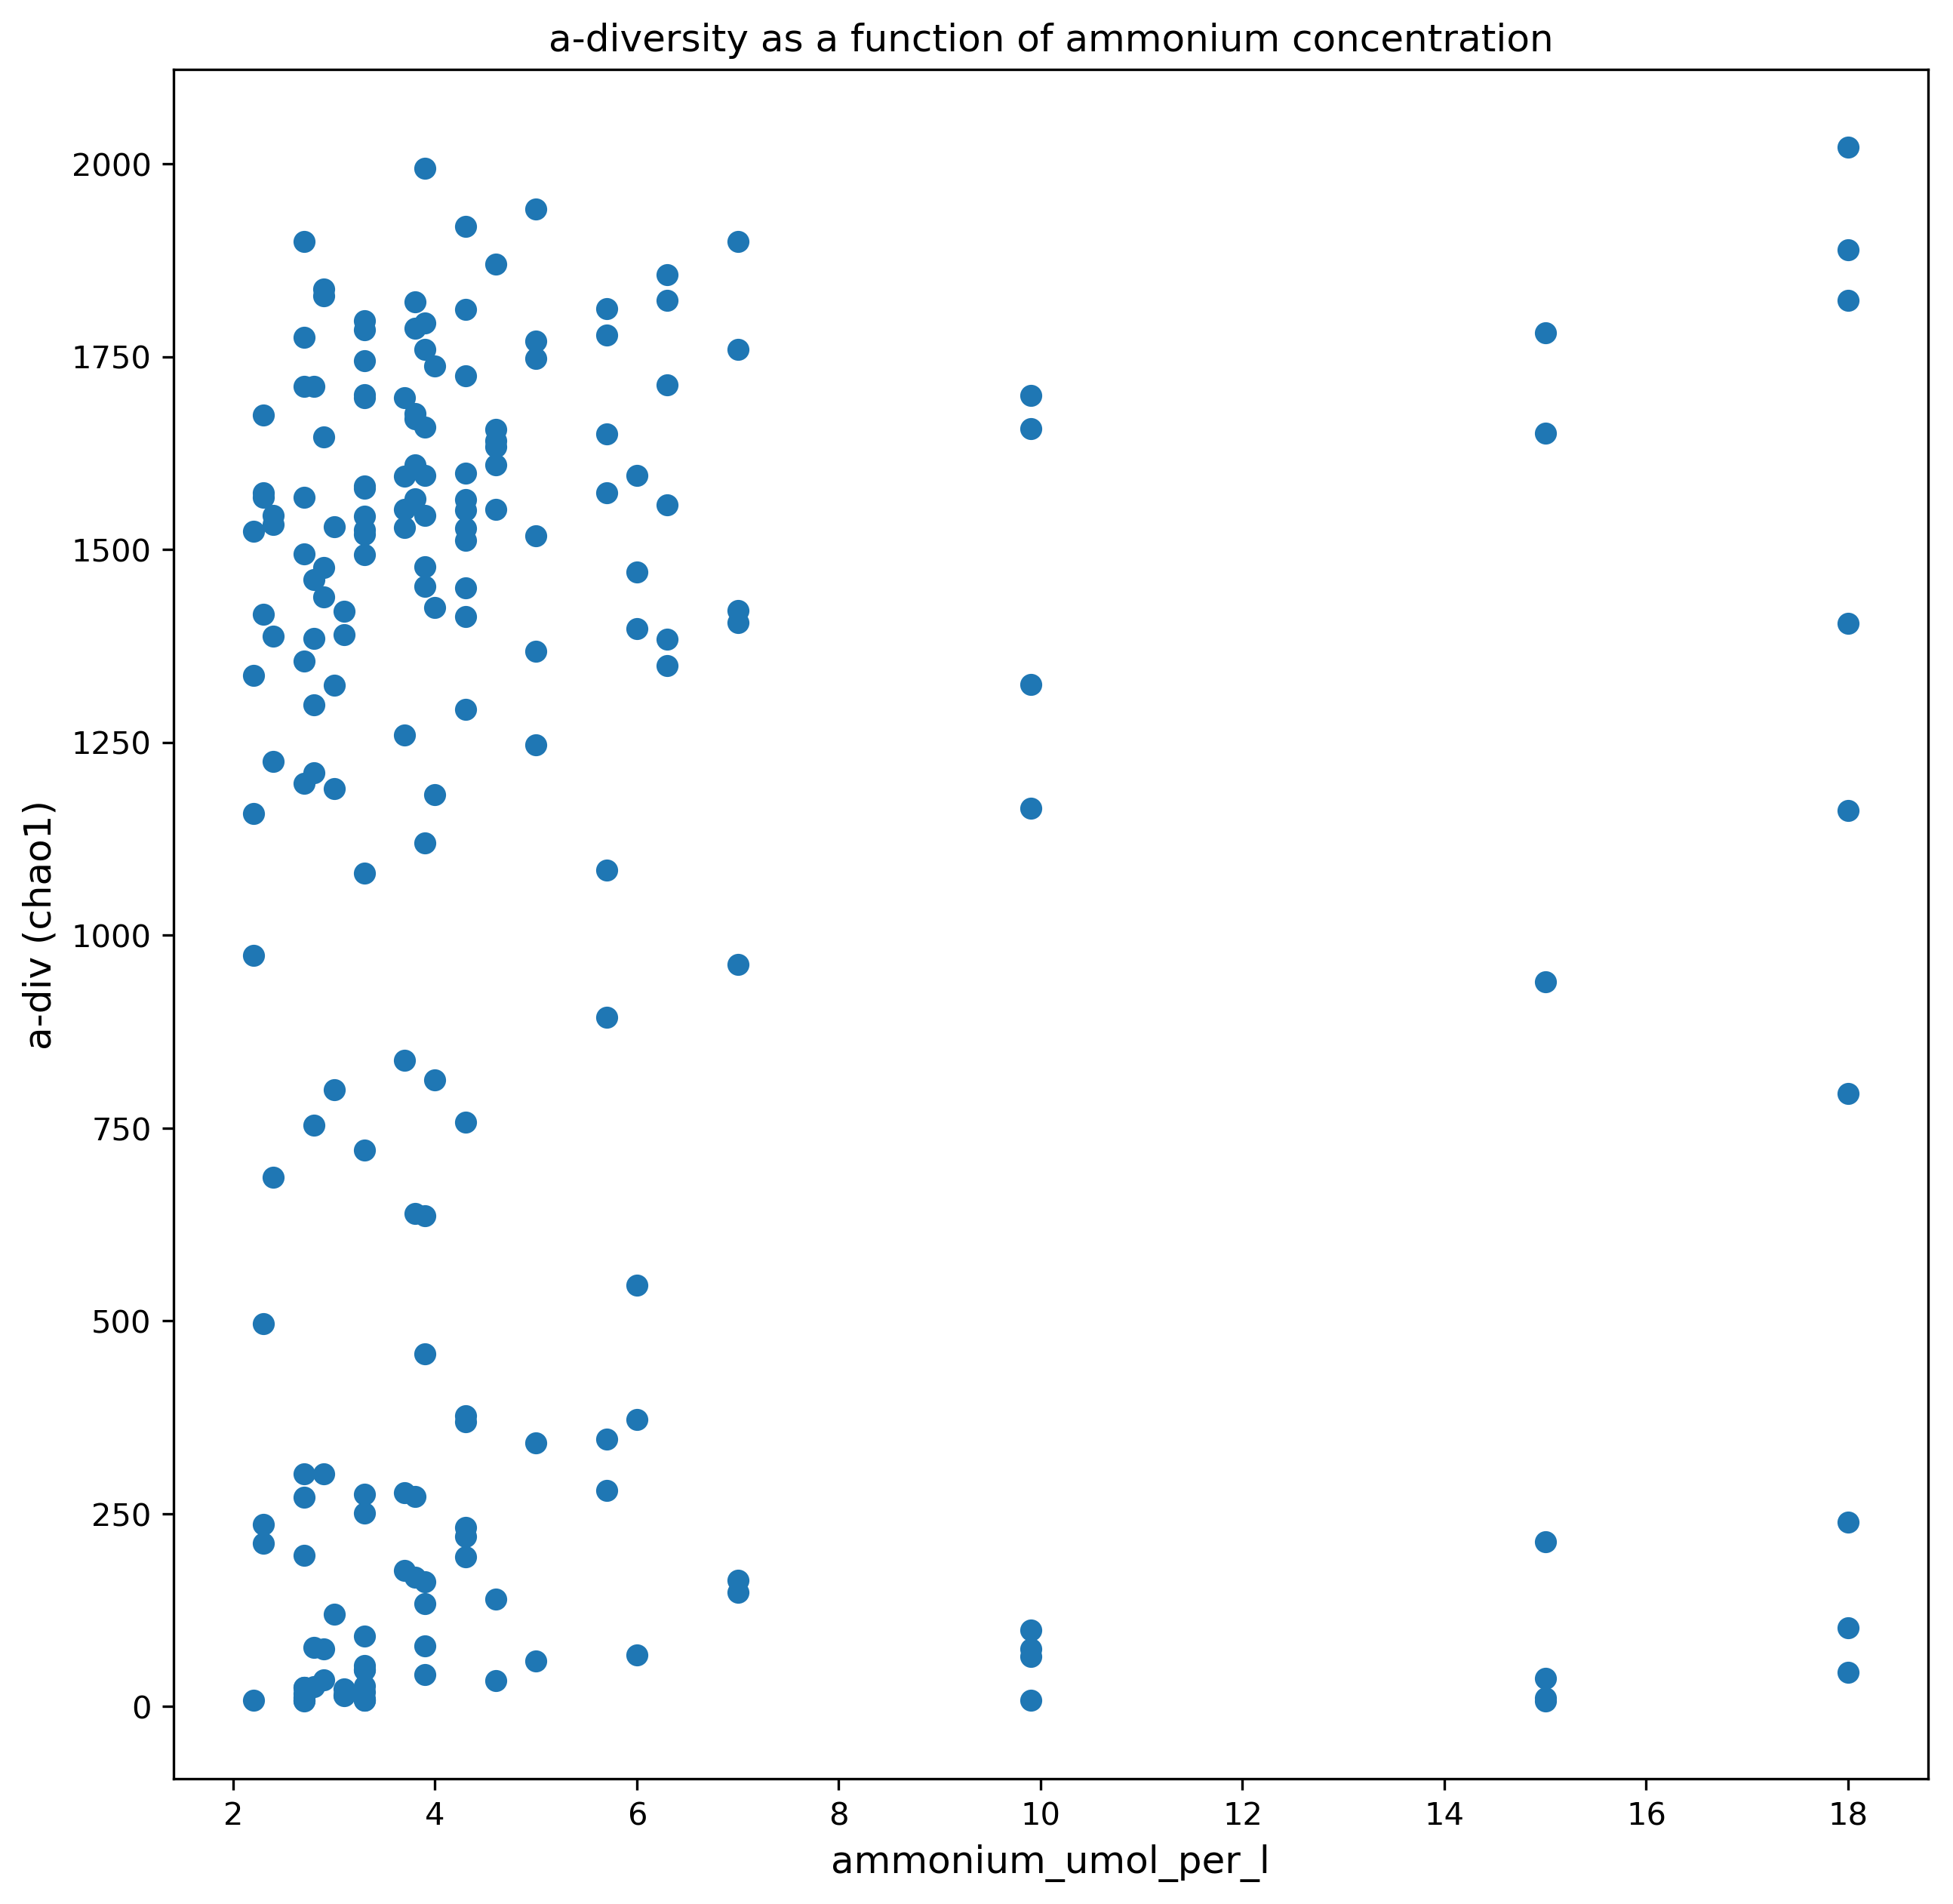

In [8]:
# sort by ammonium
soil_data_amm = soil_data.dropna(axis=0, subset=['ammonium_umol_per_l'])

#plot a-diversity against ammonium 
fig, axis = plt.subplots(figsize=(10,10), dpi=300)

X = soil_data_amm['ammonium_umol_per_l']
Y = soil_data_amm['adiv_chao1']

axis.set_title('a-diversity as a function of ammonium concentration',fontsize=12)
axis.set_xlabel('ammonium_umol_per_l',fontsize=12)
axis.set_ylabel('a-div (chao1)',fontsize=12)


axis.scatter(X, Y)
plt.show()

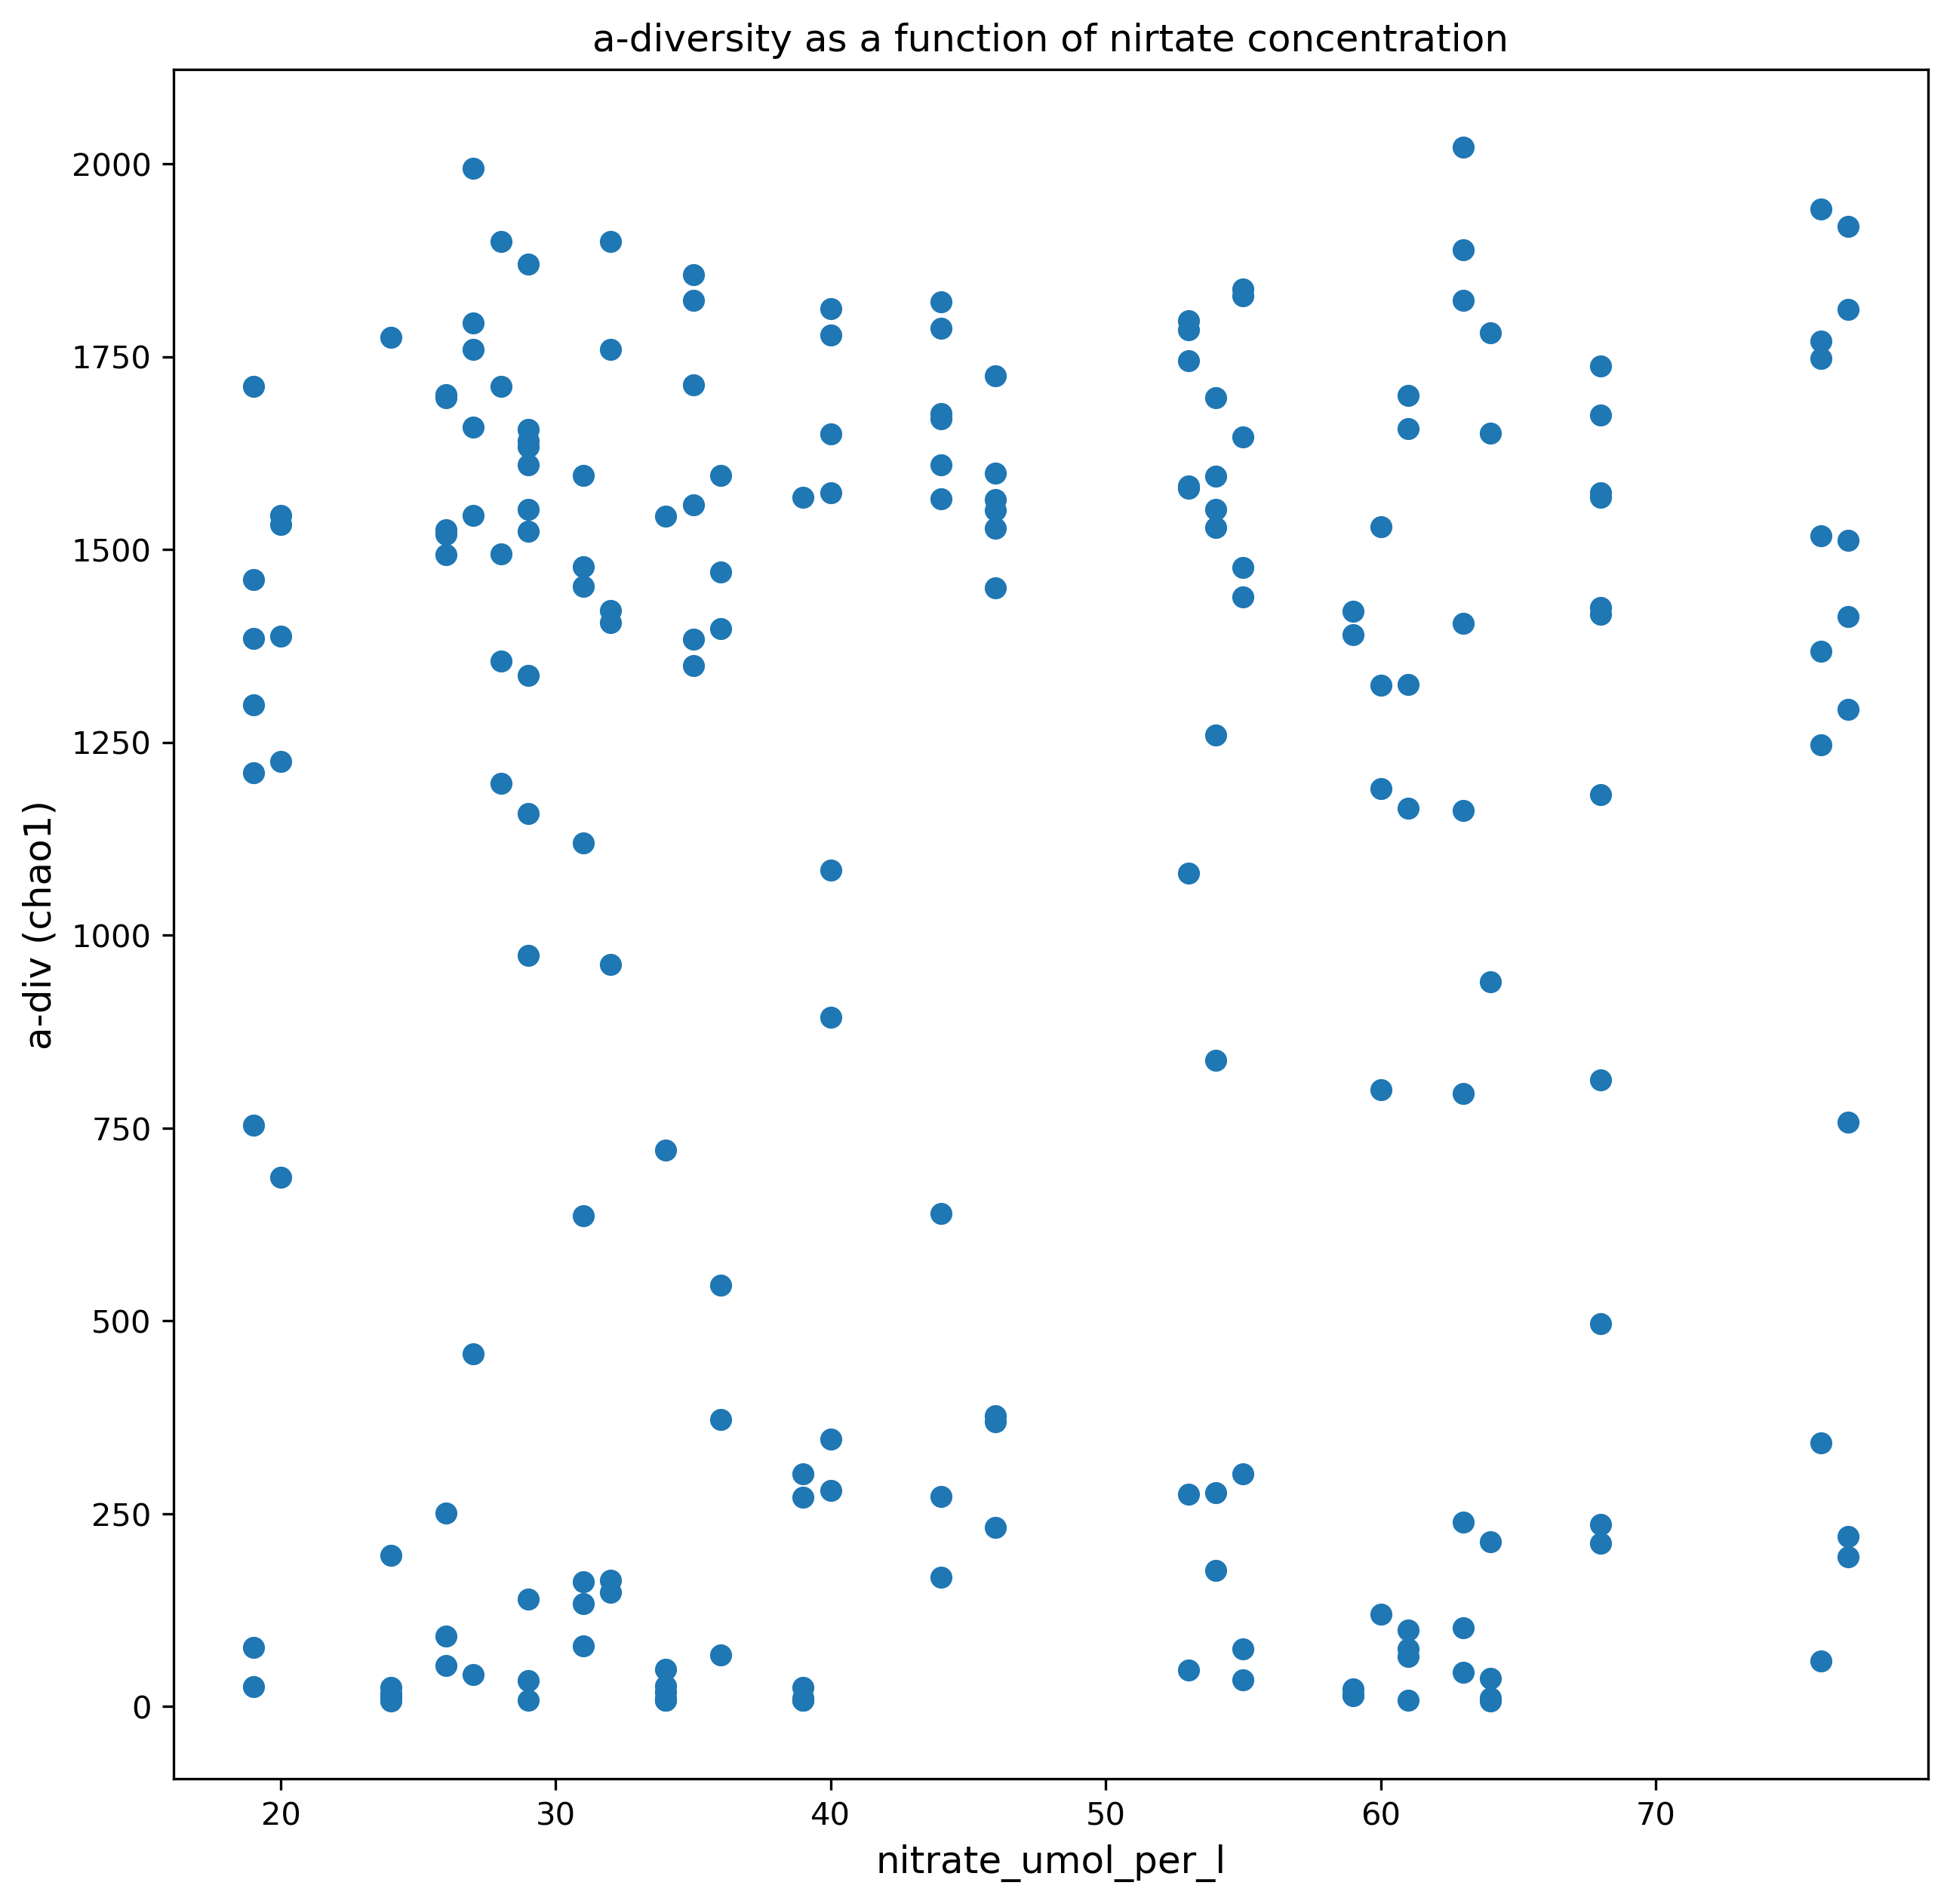

In [9]:
# sort by nitrate 
soil_data_nitr = soil_data.dropna(axis=0, subset=['nitrate_umol_per_l'])
soil_data_nitr.shape

#plot a-diversity against nitrate concentration 
fig, axis = plt.subplots(figsize=(10,10), dpi=300)

X = soil_data_amm['nitrate_umol_per_l']
Y = soil_data_amm['adiv_chao1']

axis.set_title('a-diversity as a function of nirtate concentration',fontsize=12)
axis.set_xlabel('nitrate_umol_per_l',fontsize=12)
axis.set_ylabel('a-div (chao1)',fontsize=12)

axis.scatter(X, Y)
plt.show()

In [5]:
dist_matrix = pd.read_csv('~/Documents/bioc3301_project/ngs_data/emp_data/beta_div/euclidean_emp_soil_filtered.txt', sep='\t')
dist_matrix=dist_matrix.rename(columns = {'Unnamed: 0':'Samples'})
dist_matrix.set_index('Samples', inplace=True)

dist_matrix

,1024.SH004.C1.RH.3.211.bulk.9.11.G1.L00,1033.Antarctic.soil.10A.2.1,1033.Antarctic.soil.4C.6.4,1033.Antarctic.soil.3B.7.2,1033.Antarctic.soil.9A.2.0,1033.Antarctic.soil.5C.1.7,1034.CHA12,1034.CHB2,1034.CHB7,1034.CHB8,...,846.Fagna24102011Soil12A3,846.Fagna24102011Soil12A4,846.Fagna24102011Soil12B1,846.Fagna24102011Soil12B2,846.Fagna24102011Soil12C1,846.Fagna24102011Soil12C3,846.Fagna24102011Soil12C4,895.Puhimau.soil.2,895.Puhimau.soil.3,895.Puhimau.soil.1
Samples,,,,,,,,,,,,,,,,,,,,,
1024.SH004.C1.RH.3.211.bulk.9.11.G1.L00,0.000000,52909.116596,33712.609451,41380.419041,25029.123896,31985.281412,9488.574445,44134.128789,13036.105247,43389.457349,...,14063.484135,19663.882221,10283.957507,12496.958710,11338.057461,13158.444703,18374.395092,29582.432963,13817.558106,12957.532443
1033.Antarctic.soil.10A.2.1,52909.116596,0.000000,58416.033475,55632.220224,58333.957880,54183.179752,52819.586594,64620.451554,54168.579057,67484.476467,...,54372.541370,56118.020145,53347.547488,53631.429293,53332.743563,54056.459596,55614.329017,60633.570017,54701.196120,54490.450760
1033.Antarctic.soil.4C.6.4,33712.609451,58416.033475,0.000000,42682.108195,41959.457444,30687.564892,34973.501612,54981.287944,36062.095530,54599.659953,...,36532.005995,39043.581521,35198.163333,35950.356563,35539.241143,36178.601507,38375.651382,44848.822995,36431.051838,36113.621295
1033.Antarctic.soil.3B.7.2,41380.419041,55632.220224,42682.108195,0.000000,48357.146431,47082.011565,42352.450047,59859.367638,43254.004208,59806.346444,...,43710.983311,45831.619522,42603.334916,43216.254963,42863.877648,43422.876977,45286.289283,50865.203411,43624.218984,43359.497656
1033.Antarctic.soil.9A.2.0,25029.123896,58333.957880,41959.457444,48357.146431,0.000000,40592.210115,26774.169081,50598.590978,28218.850987,49949.937778,...,28731.650336,31862.053339,27078.609510,28005.689886,27491.805870,28311.005881,31088.801489,38748.263019,28587.280126,28181.570893
1033.Antarctic.soil.5C.1.7,31985.281412,54183.179752,30687.564892,47082.011565,40592.210115,0.000000,33204.098723,52055.641337,34018.814309,52955.015740,...,34714.258411,37329.250368,32858.475330,33783.460184,33357.056855,34386.103792,36620.481974,43577.825795,34854.379624,34522.516362
1034.CHA12,9488.574445,52819.586594,34973.501612,42352.450047,26774.169081,33204.098723,0.000000,41764.618100,15332.978608,44098.161186,...,16678.135297,21655.428303,13827.384894,15502.445936,14430.180387,15891.256086,20389.358597,31072.807839,16773.103619,16072.528861
1034.CHB2,44134.128789,64620.451554,54981.287944,59859.367638,50598.590978,52055.641337,41764.618100,0.000000,42461.117343,58877.192435,...,45891.367968,47902.251889,45137.619410,45503.986759,45076.012368,45510.029631,47169.592801,53148.859348,46266.589327,46017.375468
1034.CHB7,13036.105247,54168.579057,36062.095530,43254.004208,28218.850987,34018.814309,15332.978608,42461.117343,0.000000,40937.618262,...,19180.467148,23605.833220,16617.894993,18086.058305,17287.898687,18515.651028,22527.085231,32323.678658,18988.466657,18373.856400


In [6]:
soil_data=soil_data.rename(columns = {'#SampleID':'Samples'})
soil_data.set_index('Samples', inplace=True)


In [7]:
l = []
s = []
for i in dist_matrix.columns:
    max_dist = dist_matrix[i].idxmax()
    ph_1 = soil_data['ph'].loc[i]
    ph_2 = soil_data['ph'].loc[max_dist]
    delta_ph = abs(ph_1 - ph_2)
    l.append(delta_ph)
    cleaned_L = [x for x in l if str(x) != 'nan']
    
    dist_matrix[i][dist_matrix[i].idxmin()] = dist_matrix[i].mean()
    
    min_dist = dist_matrix[i].idxmin
    ph_2 = soil_data['ph'].loc[min_dist]
    delta_ph = abs(ph_1 - ph_2)
    s.append(delta_ph)
    cleaned_S = [x for x in s if str(x) != 'nan']
    
    
print cleaned_L[0:10], cleaned_S[0:10]
 
# ttest_ind(cleaned_L, cleaned_S)

653 585


Ttest_indResult(statistic=16.73492655581817, pvalue=8.0560839911648451e-57)

In [73]:
# del cleaned_L[585:653]
# print len(cleaned_L)

from scipy.stats.stats import spearmanr
print spearmanr(cleaned_L, cleaned_S)

SpearmanrResult(correlation=0.19260388834908593, pvalue=2.6987578912960631e-06)


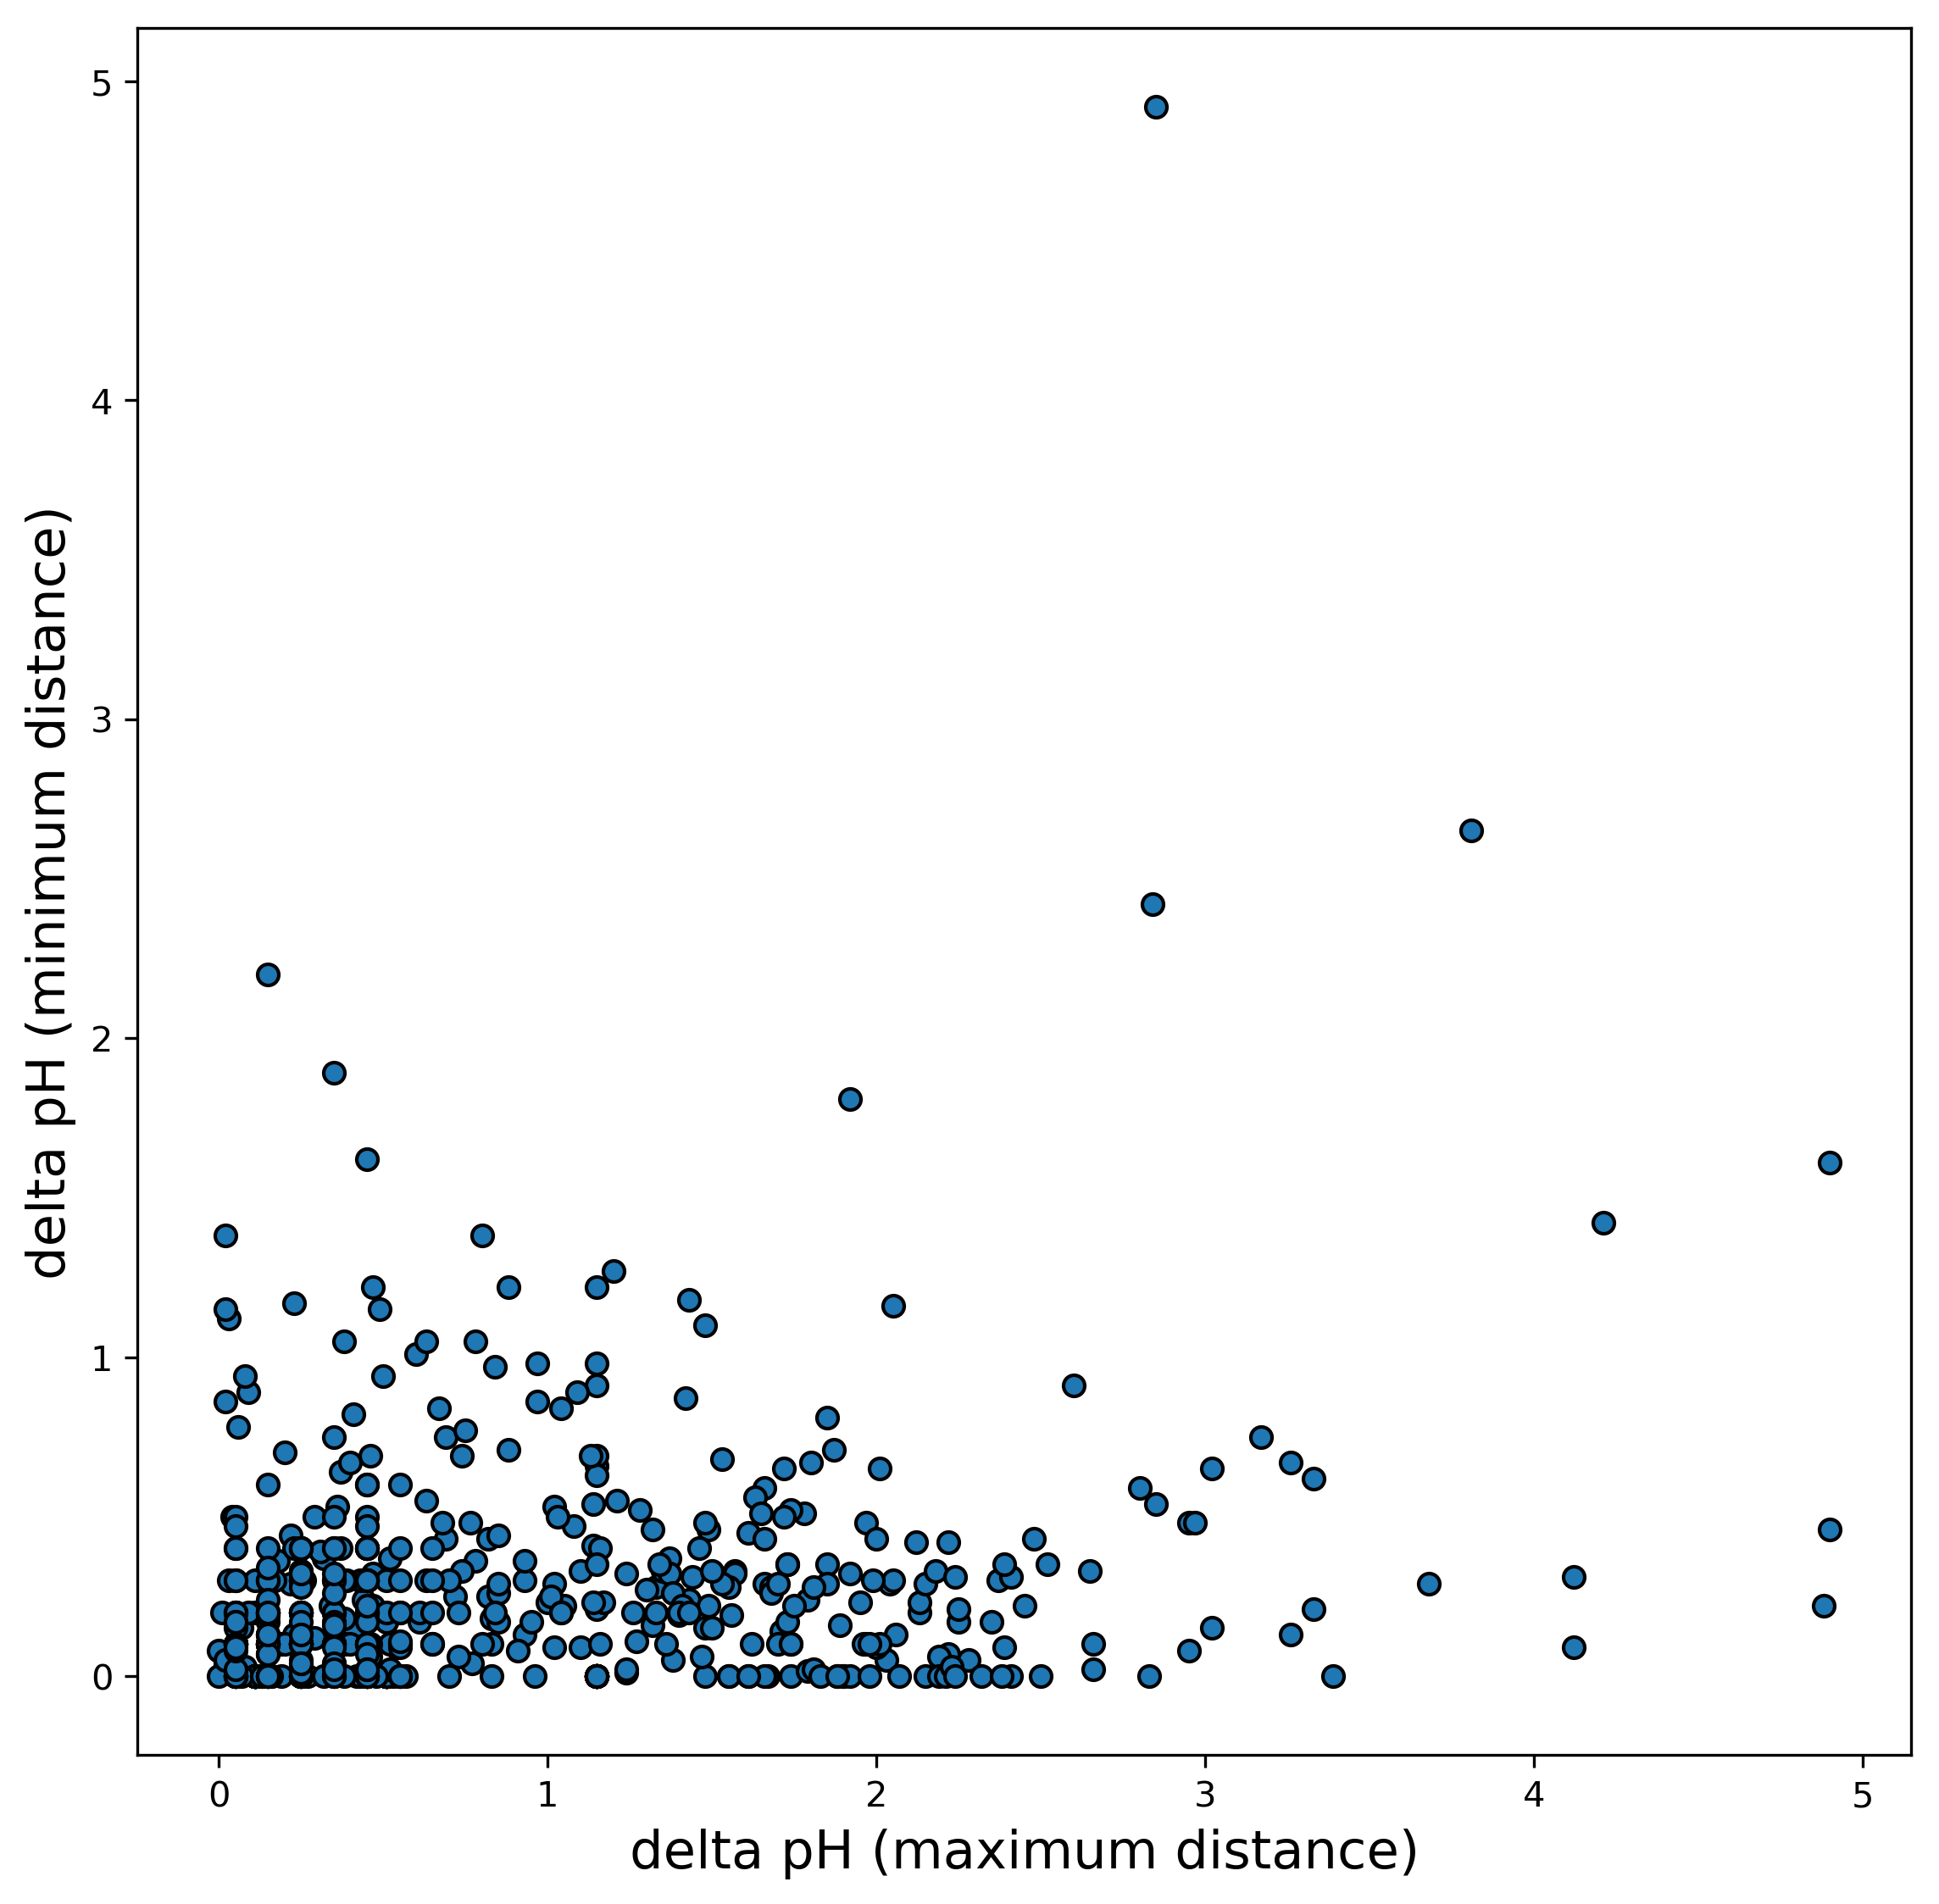

In [105]:
fig, axis = plt.subplots(figsize=(9,9), dpi=300)

X = cleaned_L
Y = cleaned_S


axis.set_xlabel('delta pH (maximum distance)',fontsize=15)
axis.set_ylabel('delta pH (minimum distance)',fontsize=15)
axis.scatter(X, Y, edgecolors='black')
# plt.axvline(7.0, linewidth=45, color = 'red', alpha = 0.3)
plt.show()

In [60]:
#bacteriodetes against pH in EMP data
df = pd.read_csv('/Users/solovyev/Documents/bioc3301_project/ngs_data/emp_data/split_by_tax_L2/hydrogenetes.txt', sep='\t', index_col=0, header=1)
df = df.T

df['sum'] = df.sum(axis=1)
x = df['sum'].sum(axis=0)
x
df['sum_norm'] = df['sum']/x*100


df.head()


/Users/solovyev/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


#OTU ID,KM456132.1.1467,LN563653.1.1340,JN178355.1.1565,KM205506.1.1472,HQ120905.1.1520,JQ337709.1.1409,DQ395923.1.1540,JN455816.1.1397,AJ604544.1.1498,LN570902.1.1381,...,JN429541.1.1362,JN498398.1.1397,HM346818.1.1203,AWNW01000006.38040.39570,GQ844344.1.1514,JN460926.1.1390,EF584529.1.1484,sum,sum_norm,sum_log
1024.SH004.C1.RH.3.211.bulk.9.11.G1.L00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.018158,0.903090
1033.Antarctic.soil.10A.2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.022697,1.000000
1033.Antarctic.soil.4C.6.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-inf
1033.Antarctic.soil.3B.7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002270,0.000000
1033.Antarctic.soil.9A.2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-inf


In [67]:
sum_log = []
for i in df['sum']:
    if i == 0:
        x = 0
        sum_log.append(x)
    else:
        x = np.log10(i)
        sum_log.append(x)
df['sum_log'] = sum_log
df
    


#OTU ID,KM456132.1.1467,LN563653.1.1340,JN178355.1.1565,KM205506.1.1472,HQ120905.1.1520,JQ337709.1.1409,DQ395923.1.1540,JN455816.1.1397,AJ604544.1.1498,LN570902.1.1381,...,JN429541.1.1362,JN498398.1.1397,HM346818.1.1203,AWNW01000006.38040.39570,GQ844344.1.1514,JN460926.1.1390,EF584529.1.1484,sum,sum_norm,sum_log
1024.SH004.C1.RH.3.211.bulk.9.11.G1.L00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.018158,0.903090
1033.Antarctic.soil.10A.2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.022697,1.000000
1033.Antarctic.soil.4C.6.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1033.Antarctic.soil.3B.7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002270,0.000000
1033.Antarctic.soil.9A.2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1033.Antarctic.soil.5C.1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.004539,0.301030
1034.CHA12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.086250,1.579784
1034.CHB2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.022697,1.000000
1034.CHB7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1034.CHB8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


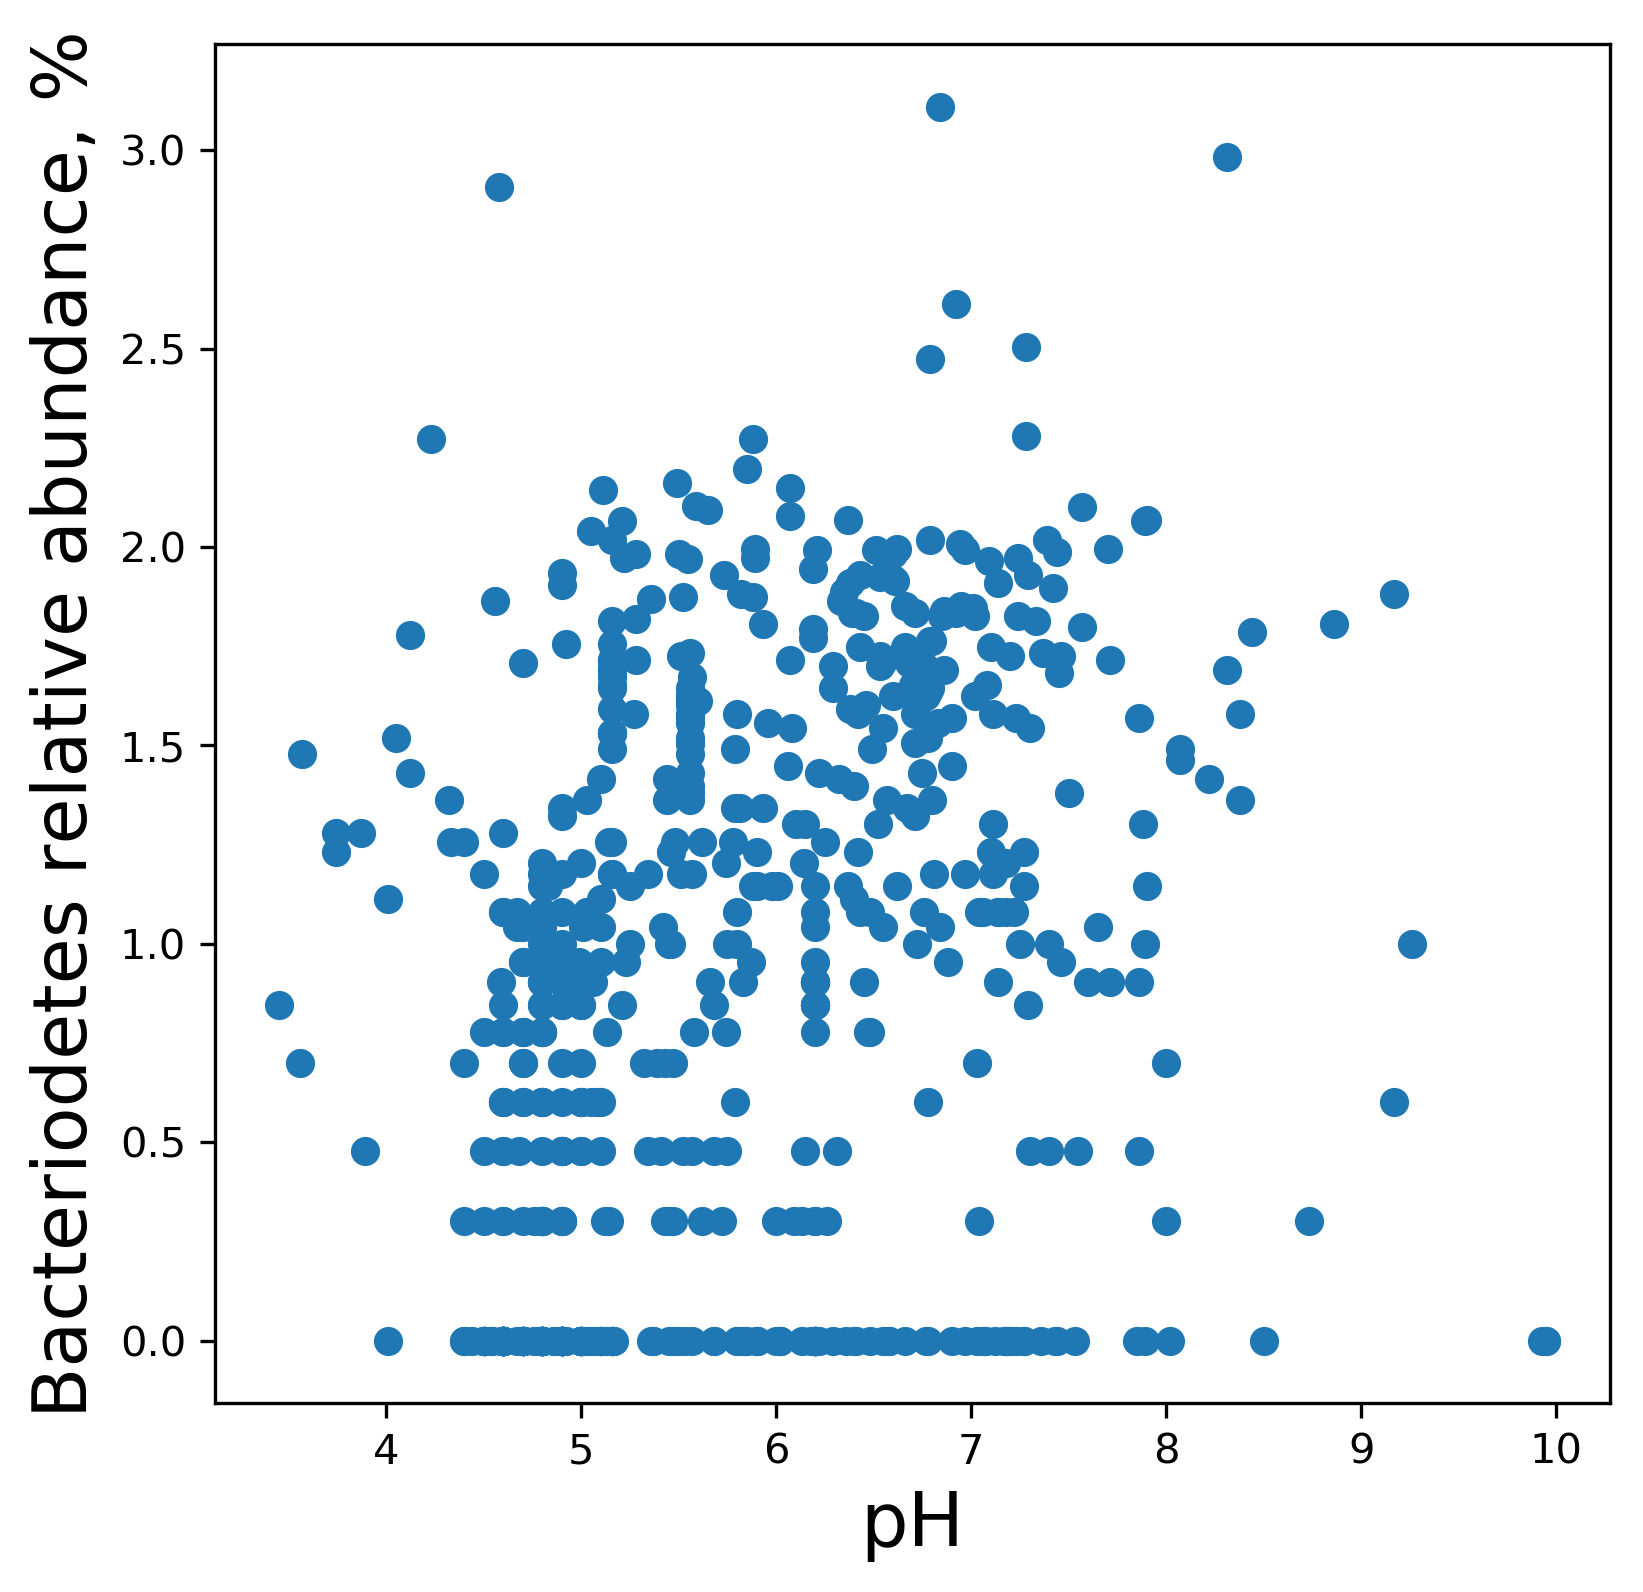

In [68]:
#plot abundance against pH 
fig, axis = plt.subplots(figsize=(6,6), dpi=300)

X = soil_data['ph']
Y = df['sum_log']

# axis.set_title('a-diversity as a function of soil pH',fontsize=12)
axis.set_xlabel('pH',fontsize=18)
axis.set_ylabel('Bacteriodetes relative abundance, %',fontsize=18)
axis.scatter(X, Y)
# plt.axvline(7.0, linewidth=45, color = 'red', alpha = 0.3)
plt.show()

In [47]:
print df.shape, soil_data.shape


(1703, 14385) (1703, 76)


In [46]:
soil_data = soil_data.drop(soil_data.index[1703:])